### Attrition Analytics - Exploratory Analysis & Predictive Modeling

### Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#using the seaborn style for graphs
#plt.style.use("seaborn")
plt.style.use("seaborn-v0_8")

In [4]:
# ## Read the dataset
# employee_data = pd.read_excel("Attrition.xlsx")
employee_data = pd.read_excel(r"C:\Users\Dell\Downloads\HRAnalyticsEmployeeAttrition\HRAnalyticsEmployeeAttrition-master\data\Attrition.xlsx")

In [5]:
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
##looking for any missing values

employee_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Exploratory Data Analysis

In [8]:
## basic descriptive statistics
employee_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
#Mapping the attrition 1 - yes and 0 - no in the new column

employee_data["left"] = np.where(employee_data["Attrition"] == "Yes",1,0)

In [10]:
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,left
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [11]:
#supressing all the warnings
import warnings
warnings.filterwarnings('ignore')

- Remove not usefull features

In [12]:
def NumericalVariables_targetPlots(df,segment_by,target_var = "Attrition"):
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    
    sns.boxplot(x = target_var, y = segment_by, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)
    
    #distribution plot
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment_by], ax=ax[1], kde=False)
    
    plt.show()

In [13]:
def CategoricalVariables_targetPlots(df, segment_by,invert_axis = False, target_var = "left"):
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="Attrition",ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df,hue="Attrition",ax=ax[0])
        
    ax[0].set_title("Comparision of " + segment_by + " vs " + "Attrition")
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,ci=None)
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df,ci=None)
        
    ax[1].set_title("Attrition rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(Attrition)")
    plt.tight_layout()

    plt.show()

### Analyizing the variables

- Numerical Variables

### Age

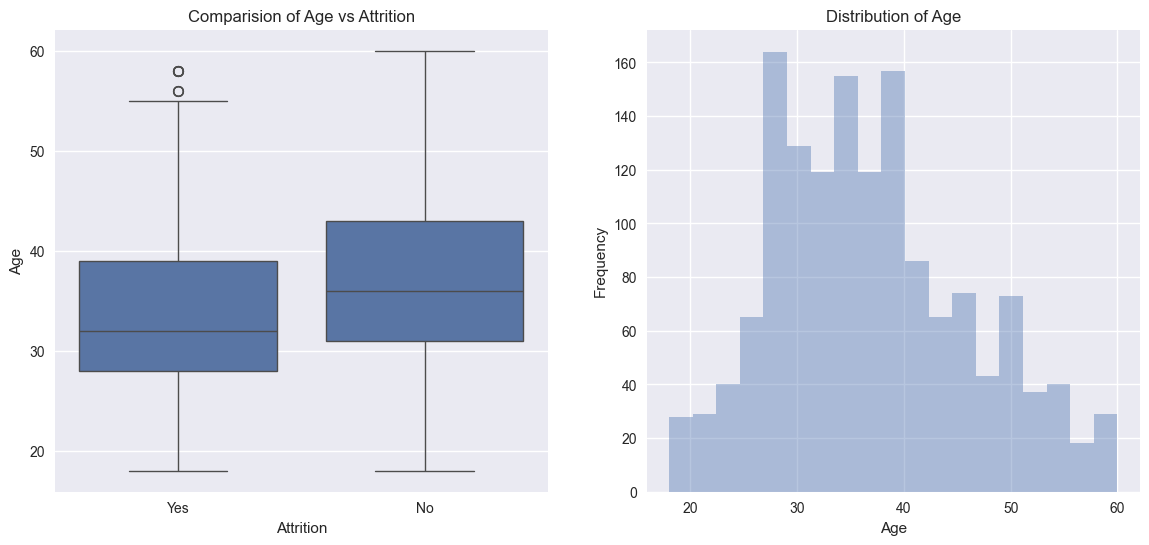

In [14]:
NumericalVariables_targetPlots(employee_data,segment_by="Age")

- We found that median age of employee's in the company is 30 - 40 Yrs. Minimum age is 18 Yrs and Maximum age is 60 Yrs.
- From the Age Comparision boxplot, majority of people who left the company are below 40 Yrs and among the people who didn't left the company are of age 32 to 40 years

### Daily Rate & Montly Income & HourlyRate

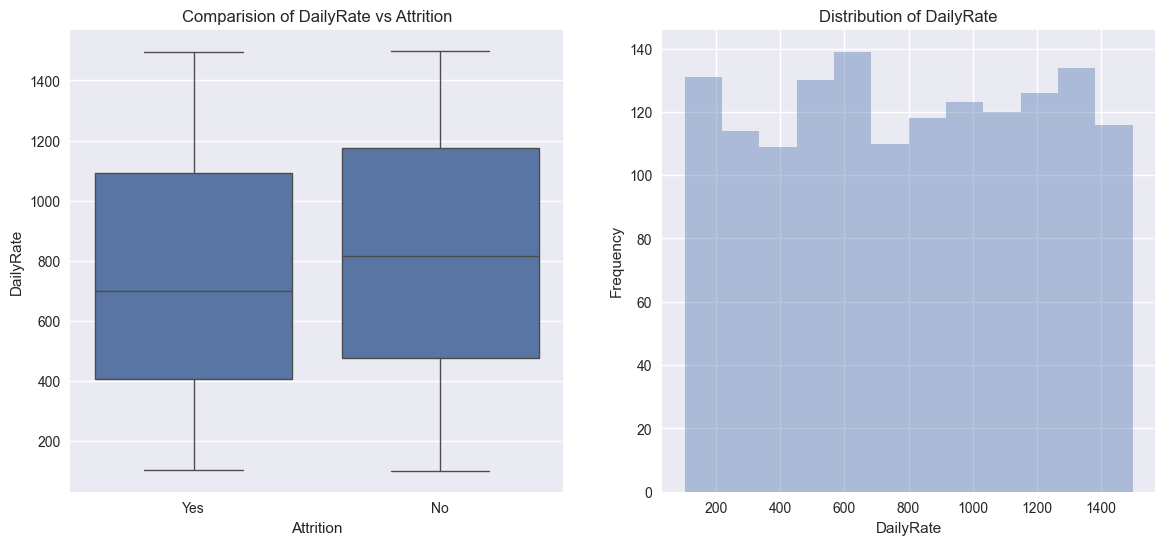

In [15]:
NumericalVariables_targetPlots(employee_data,"DailyRate")

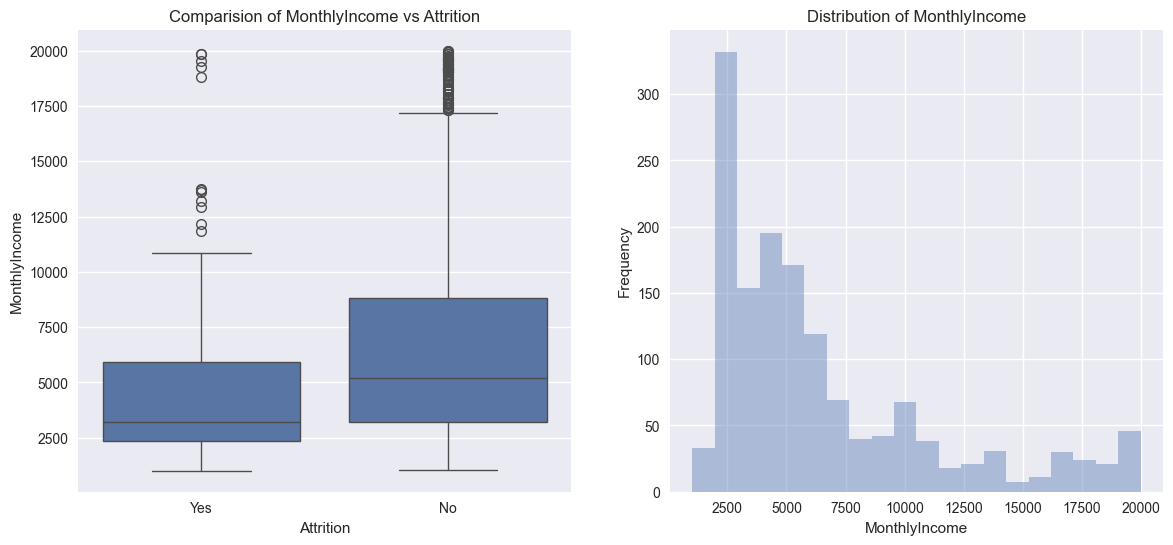

In [16]:
NumericalVariables_targetPlots(employee_data,"MonthlyIncome")

- Employee's working with lower daily rates are more prone to leave the company than compared to the employee's working with higher rates. The same trend is resonated with monthly income too.

**Hourly Rate**

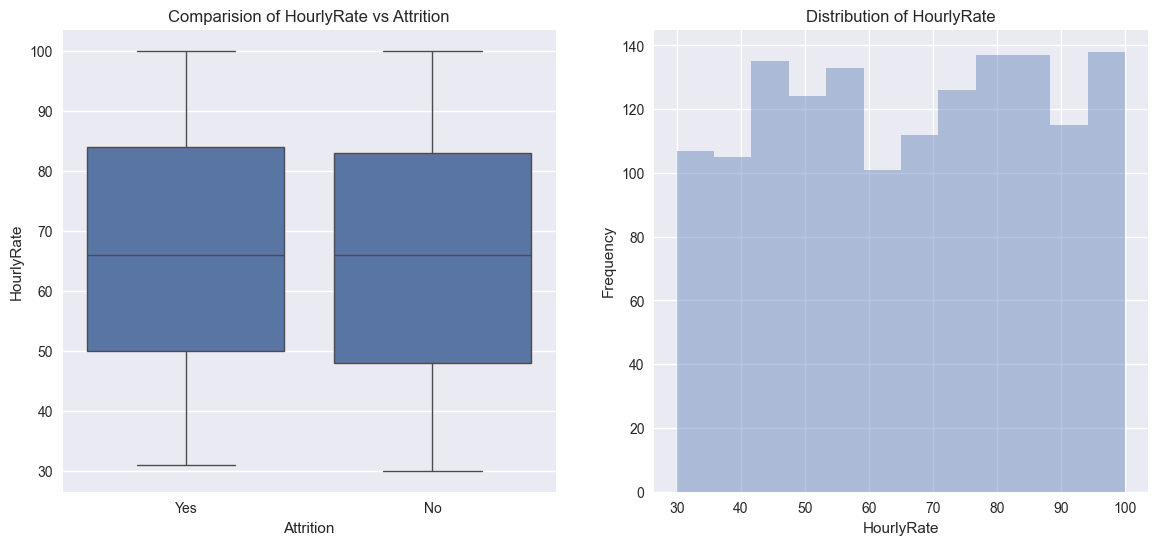

In [17]:
NumericalVariables_targetPlots(employee_data,"HourlyRate")

- From plot we have seen that there is no significant difference in the hourly rate and attrition. Therefore hourly rate is considered as not signifcant to attrition 

### PercentSalaryHike

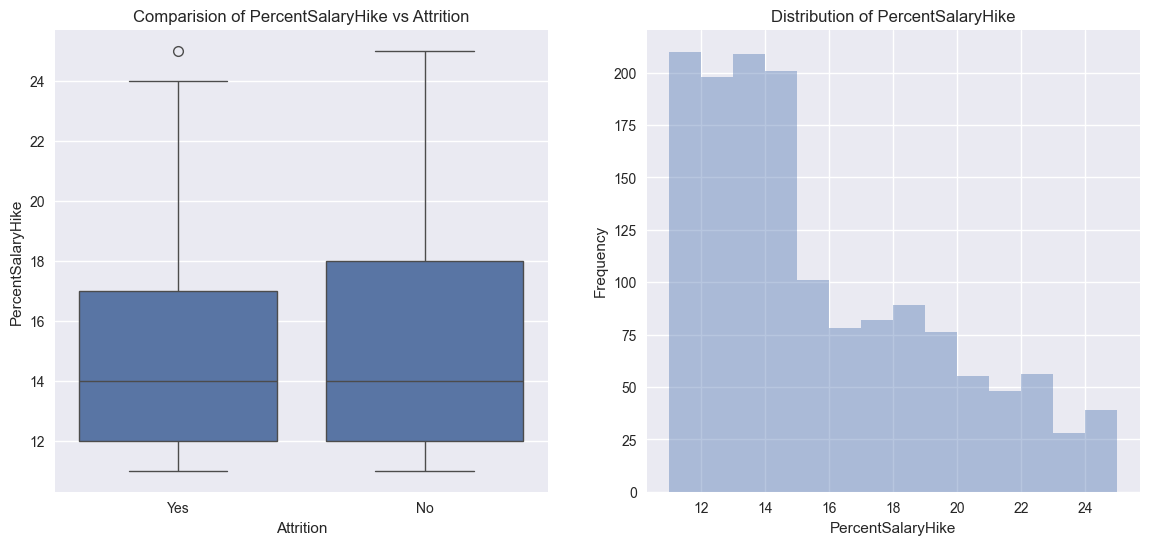

In [18]:
NumericalVariables_targetPlots(employee_data,"PercentSalaryHike")

- Majority (60% of total strength) of employee's receive 16% salary hike in the company, employee's who received less salary hike have left the company.

### Total Working years

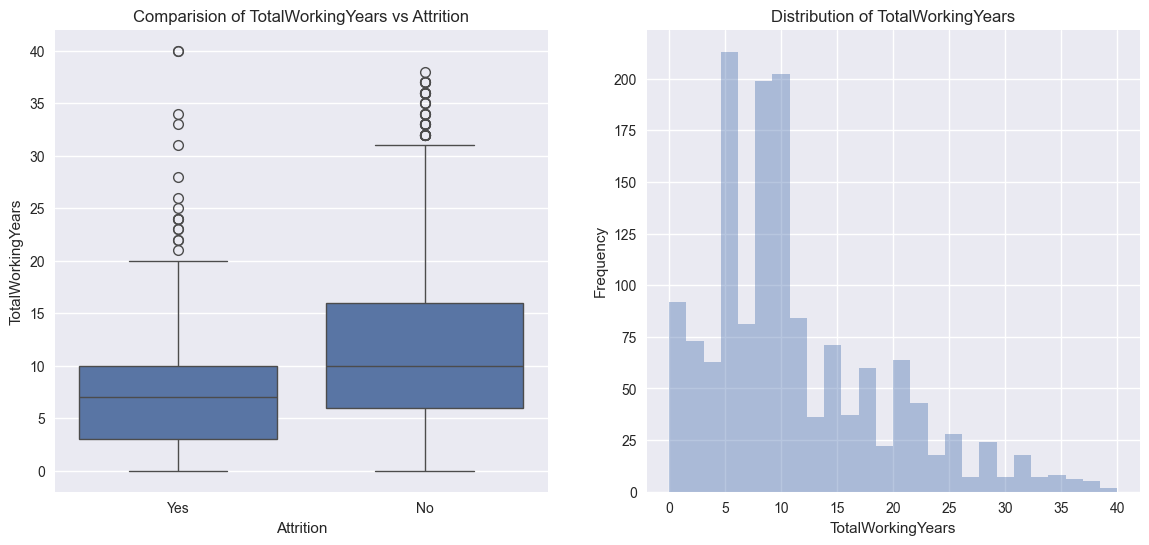

In [19]:
NumericalVariables_targetPlots(employee_data,"TotalWorkingYears")

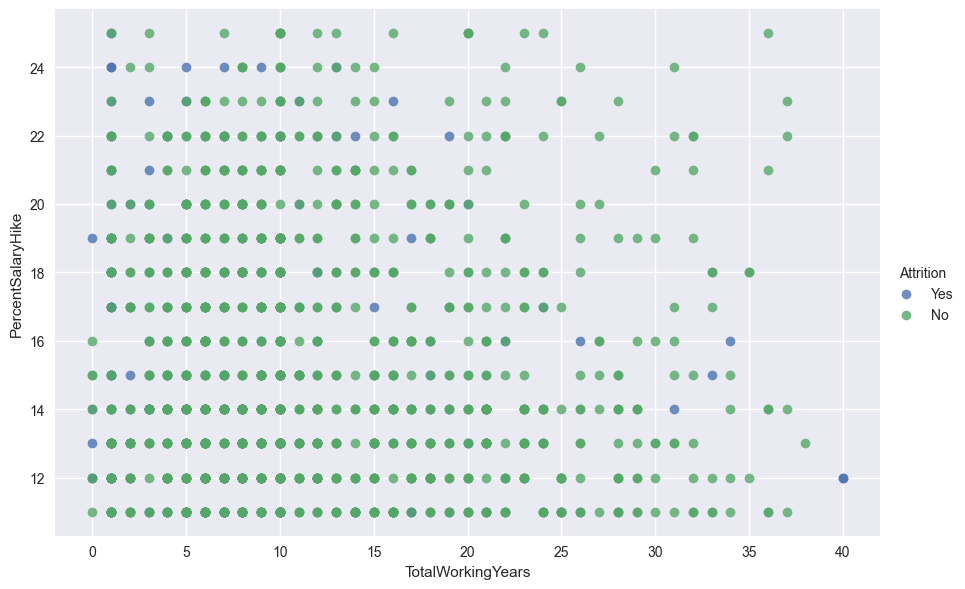

In [20]:
sns.lmplot(x="TotalWorkingYears", y="PercentSalaryHike", data=employee_data, 
           fit_reg=False, hue="Attrition", height=6, aspect=1.5)

plt.show()

- Employee's with less working years have received 25% Salary hike when they switch to another company, but there is no linear relationship between working years and salary hike. 
- Attrition is not seen amomg the employee's having more than 20 years of experience if their salary hike is more than 20%, even if the salary hike is below 20% attrition rate among the employee's is very low.
- Employee's with lesser years of experience are prone to leave the company in search of better pay, irrespective of salary hike

### Distance From Home

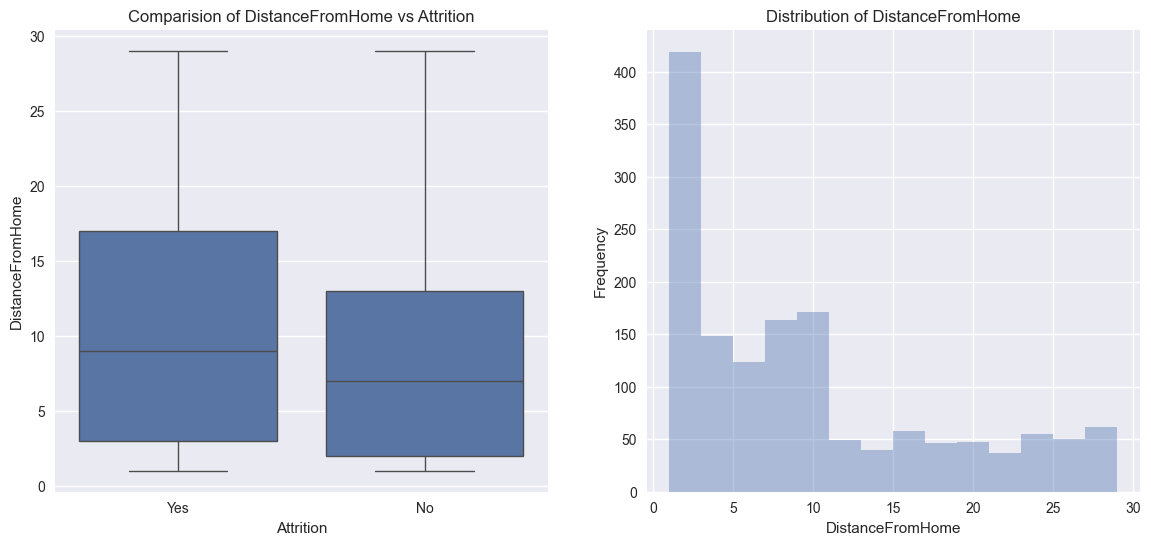

In [21]:
NumericalVariables_targetPlots(employee_data,"DistanceFromHome")

- There is a higher number of people who reside near to offices and hence the attrition levels are lower for distance less than 10. With increase in distance from home, attrition rate also increases

## Analyizing the variables

- Categorical Variables

### Job Involvement

In [22]:

pd.crosstab(employee_data.JobInvolvement,employee_data.Attrition)

Attrition,No,Yes
JobInvolvement,,
1,55,28
2,304,71
3,743,125
4,131,13


In [23]:
#calculating the percentage of people having different job involvement rate
round(employee_data.JobInvolvement.value_counts()/employee_data.shape[0] * 100,2)

JobInvolvement
3    59.05
2    25.51
4     9.80
1     5.65
Name: count, dtype: float64

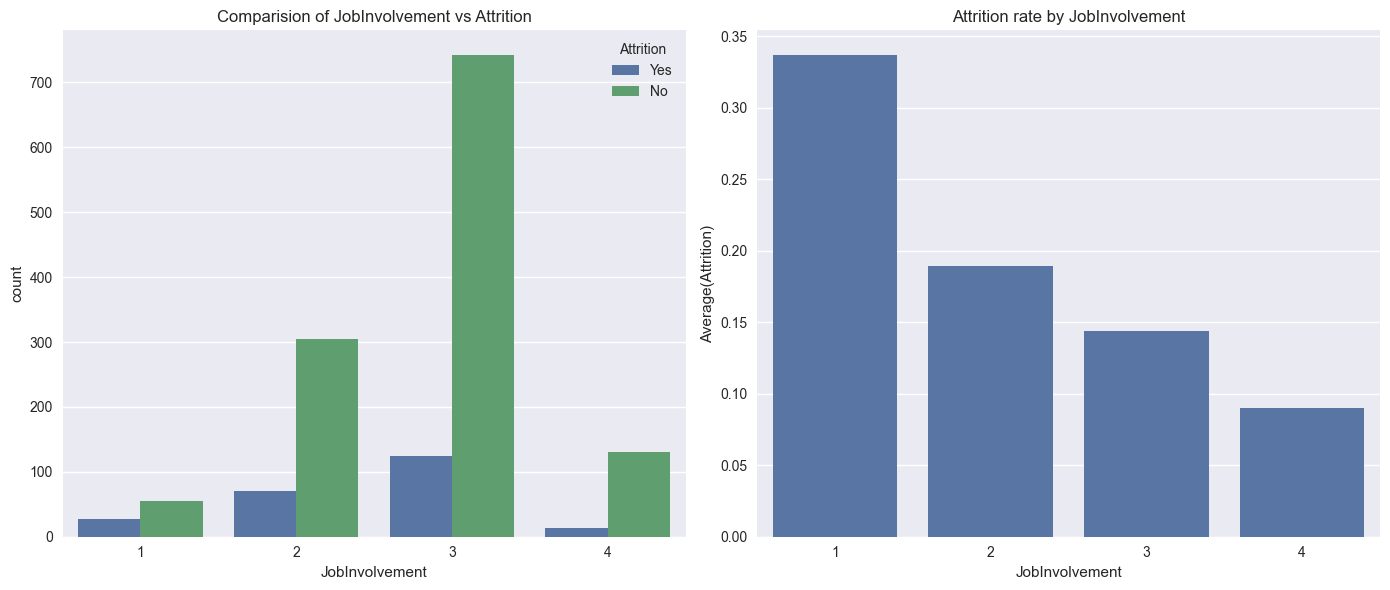

In [24]:
CategoricalVariables_targetPlots(employee_data,"JobInvolvement")

1. In the total data set, 59% have high job involvement whereas 25% have medium involvement rate
2. From above plot we can observe that round 50% of people in low job involvement (level 1 & 2) have left the company.
3. Even the people who have high job involmenent have higher attrition rate around 15% in that category have left company

### JobSatisfaction

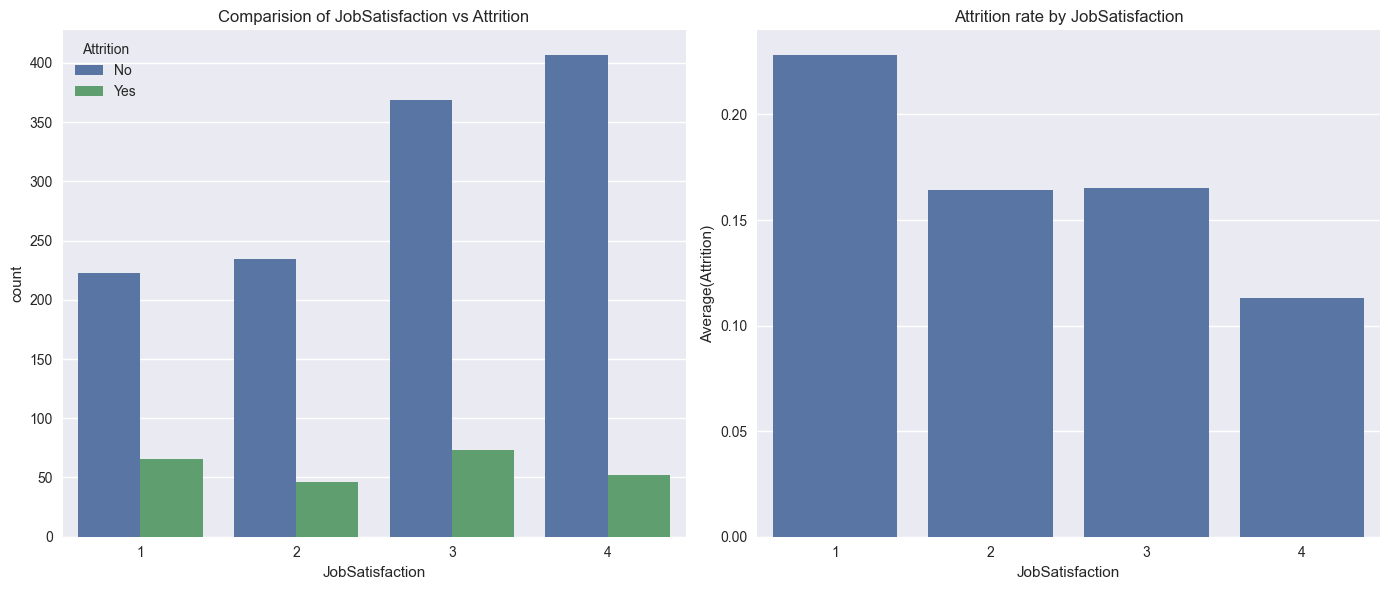

In [25]:
CategoricalVariables_targetPlots(employee_data,"JobSatisfaction")

As expected, people with low satisfaction have left the company around 23% in that category. what surprising is out of the people who rated medium and high job satisfaction around 32% has left the company. There should be some other factor which triggers their exit from the company

### Performance Rating

In [26]:
#checking the number of categories under performance rating
employee_data.PerformanceRating.value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

In [27]:
#calculate the percentage of performance rating per category in the whole dataset
round(employee_data.PerformanceRating.value_counts()/employee_data.shape[0] * 100,2)

PerformanceRating
3    84.63
4    15.37
Name: count, dtype: float64

Around 85% of people in the company rated as Excellent and remaining 15% rated as Outstanding

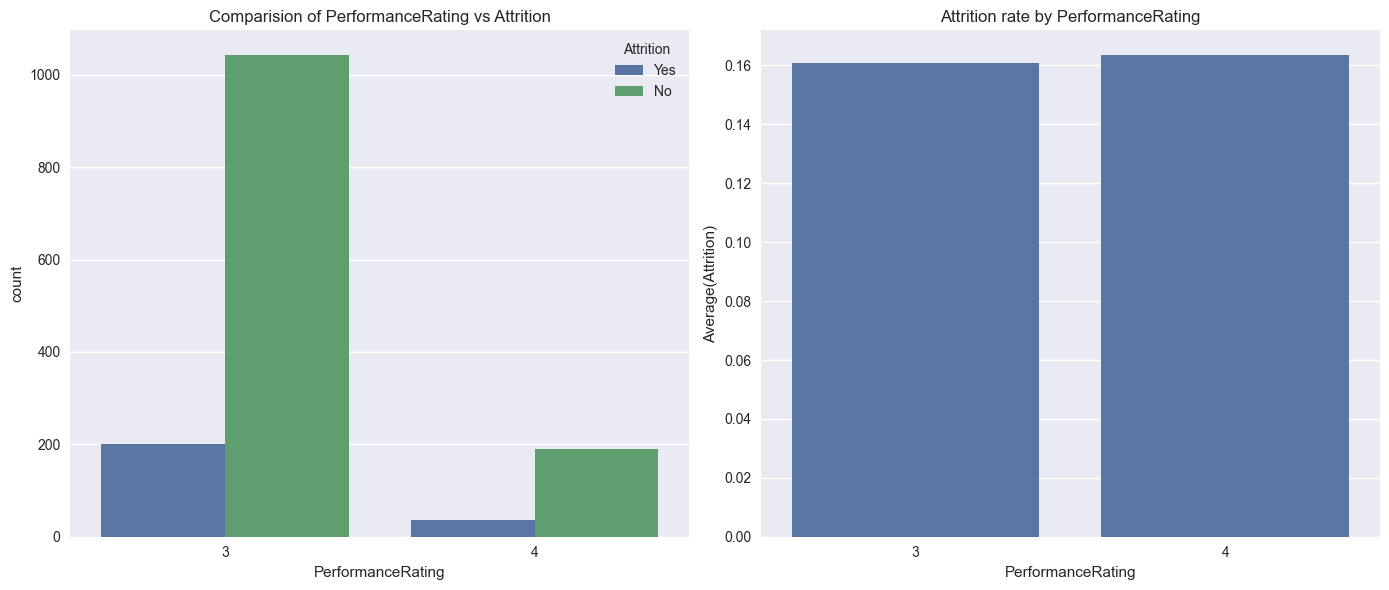

In [28]:
CategoricalVariables_targetPlots(employee_data,"PerformanceRating")

Contrary to normal belief that employee's having higher rating will not leave the company. It may be seen that there is no significant difference between the performance rating and Attrition Rate.

### RelationshipSatisfaction

In [29]:
#percentage of each relationship satisfaction category across the data
round(employee_data.RelationshipSatisfaction.value_counts()/employee_data.shape[0],2)

RelationshipSatisfaction
3    0.31
4    0.29
2    0.21
1    0.19
Name: count, dtype: float64

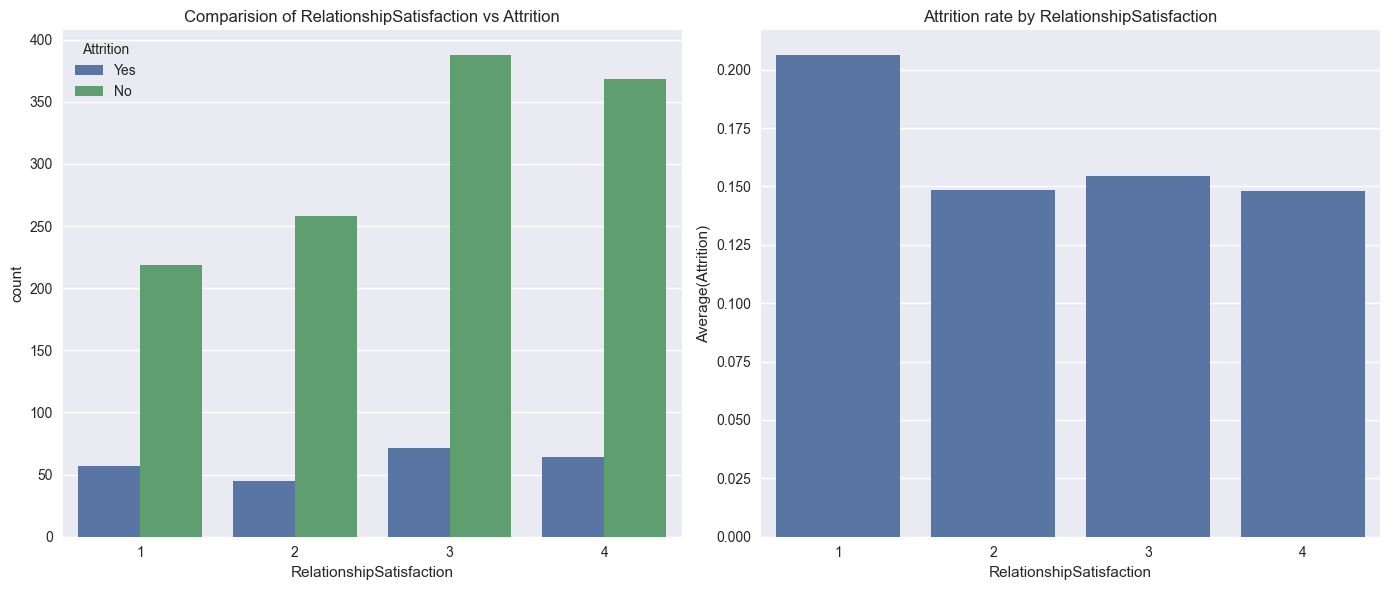

In [30]:
CategoricalVariables_targetPlots(employee_data,"RelationshipSatisfaction")

In this too, we found that almost 30% of employees with high and very high RelationshipSatisfaction have left the company. Here also there is no visible trend among the relationshipsatisfaction and attrition rate

### WorkLifeBalance


In [31]:
#percentage of worklife balance rating across the company data
round(employee_data.WorkLifeBalance.value_counts()/employee_data.shape[0],2)

WorkLifeBalance
3    0.61
2    0.23
4    0.10
1    0.05
Name: count, dtype: float64

More than 60% of the employee's rated that they have Better worklife balance and 10% rated for Best worklife balance

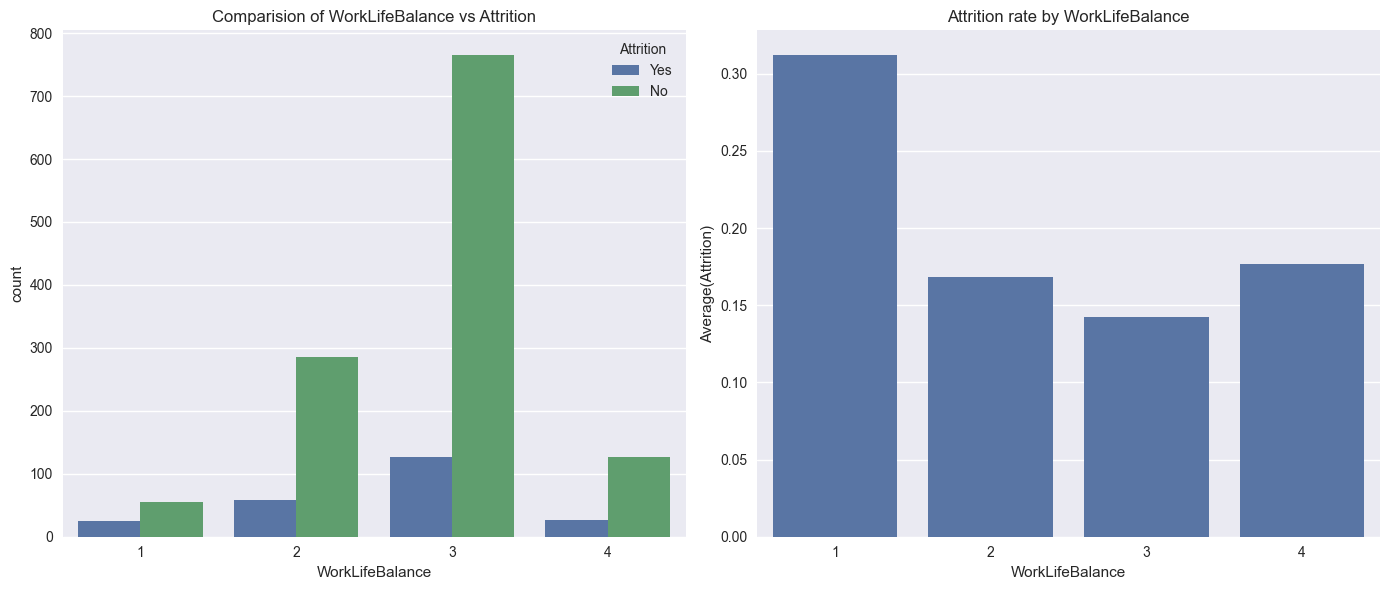

In [32]:
CategoricalVariables_targetPlots(employee_data,"WorkLifeBalance")

- As expected more than 30% of the people who rated as Bad WorkLifeBalance have left the company and around 15% of the people who rated for Best WorkLifeBalance also left the company

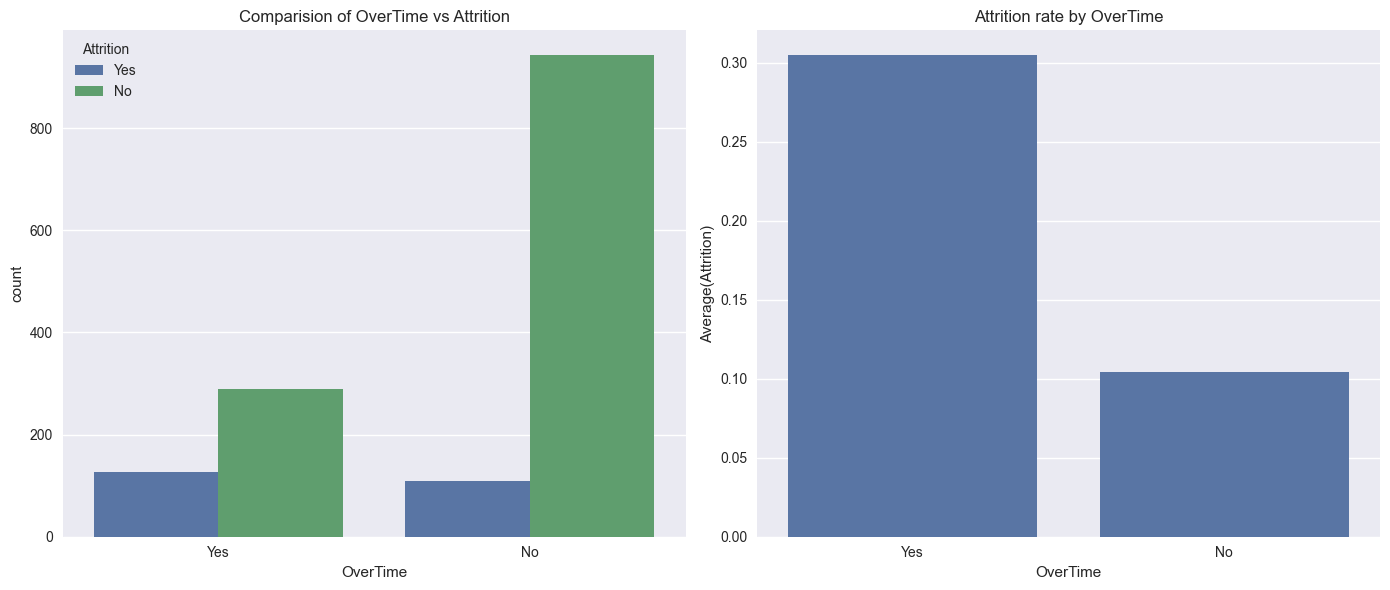

In [33]:
CategoricalVariables_targetPlots(employee_data,"OverTime")

More than 30% of employee's who worked overtime has left the company, where as 90% of employee's who have not experienced overtime has not left the company. Therefore overtime is a strong indicator of attrition

### BusinessTravel

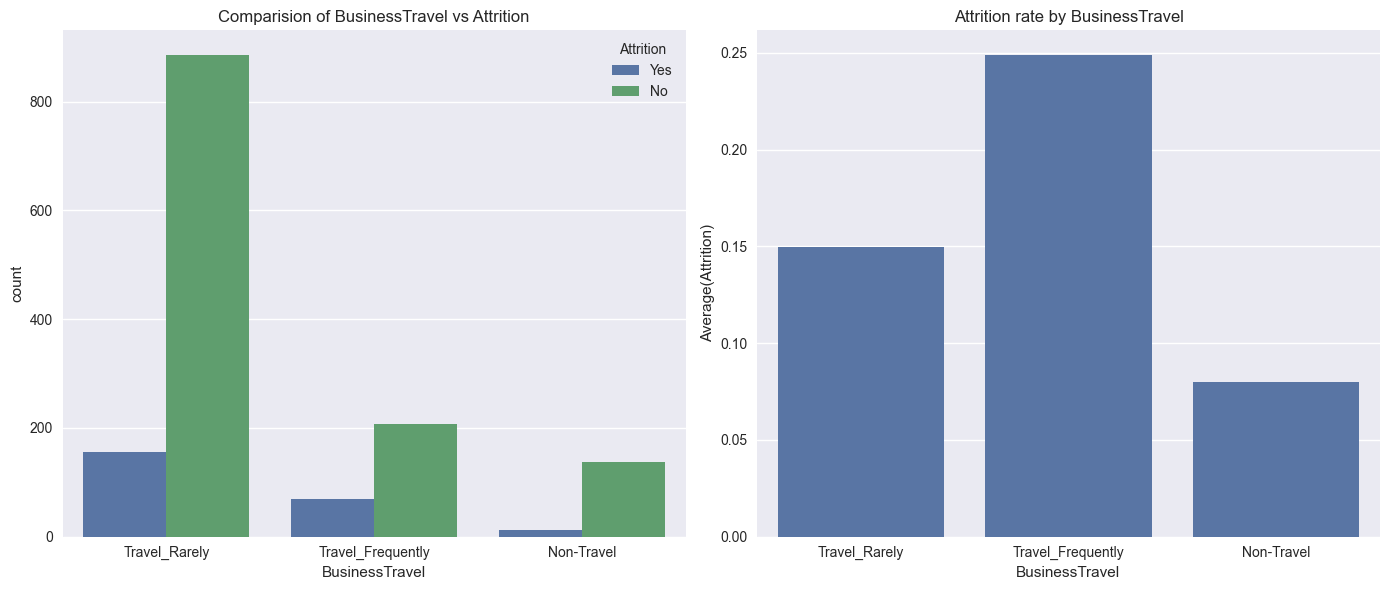

In [34]:
CategoricalVariables_targetPlots(employee_data,segment_by="BusinessTravel")

- There are more people who travel rarely compared to people who travel frequently. In case of people who travel Frequently  around 25% of people have left the company and in other cases attrition rate doesn't vary significantly on travel

### Department

In [35]:
employee_data.Department.value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

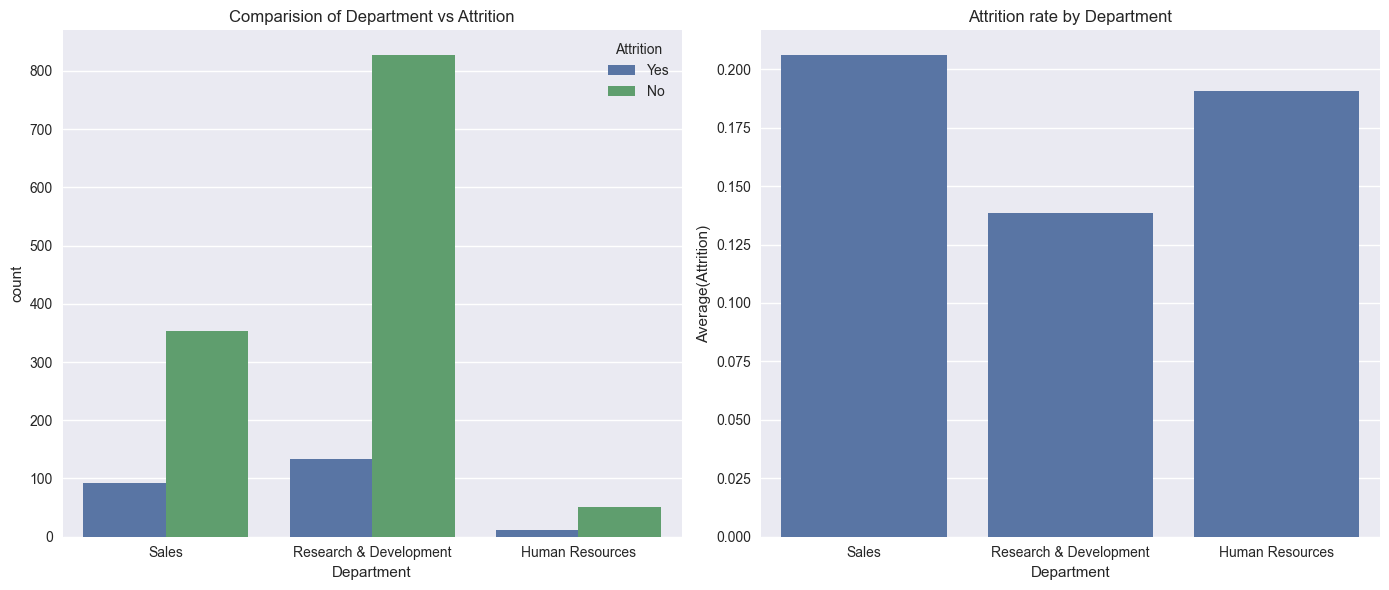

In [36]:
CategoricalVariables_targetPlots(employee_data,segment_by="Department")

- On comparing departmentwise,we can conclude that HR has seen only a marginal high in turnover rates whereas the numbers are significant in sales department with turnover rates of 39 %. The attrition levels are not appreciable in R & D where 67 % have recorded no attrition.
- Sales has seen higher attrition levels about 20.6% followed by HR around 18%

### EducationField

In [37]:
employee_data.EducationField.value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

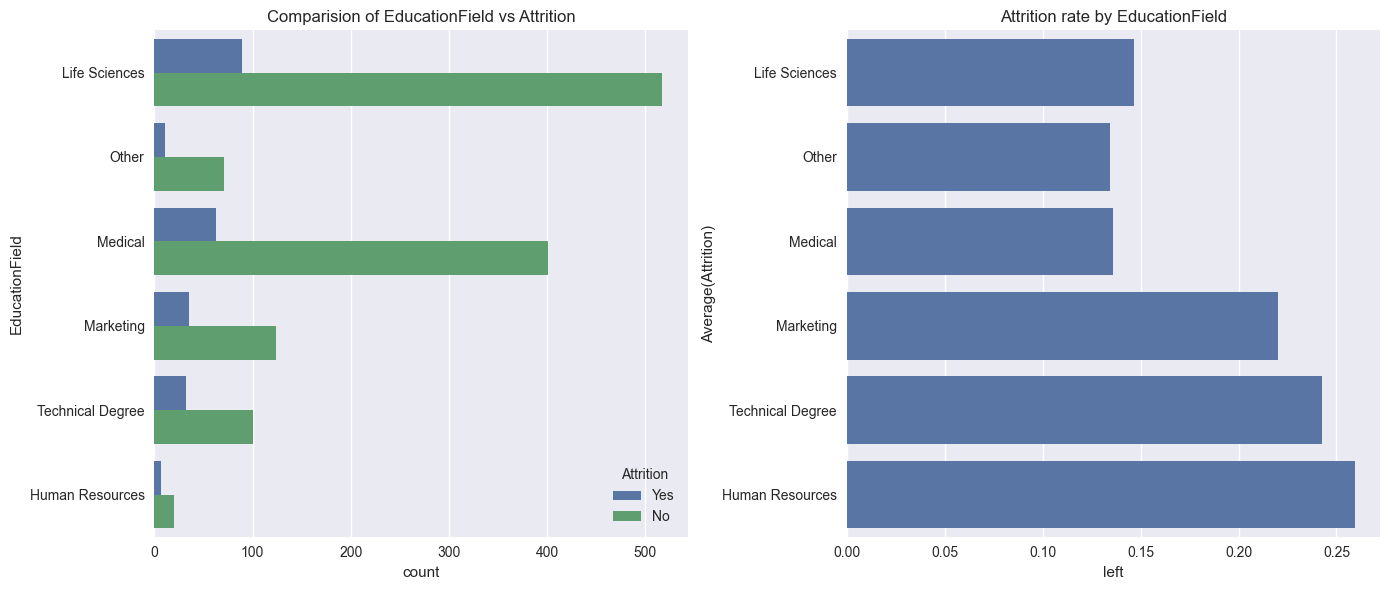

In [38]:
CategoricalVariables_targetPlots(employee_data,"EducationField",invert_axis=True)

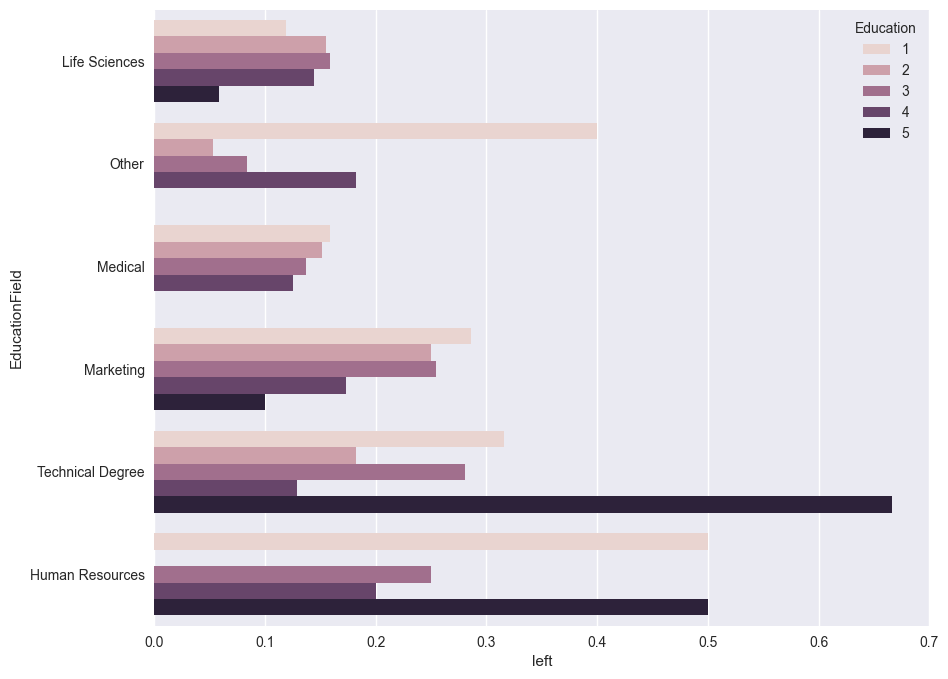

In [39]:
plt.figure(figsize=(10,8))
sns.barplot(y = "EducationField", x = "left", hue="Education", data=employee_data,ci=None)
plt.show()

- There are more people with a Life sciences followed by medical and marketing
- Employee's in the EducationField of Human Resources and Technical Degree have highest attrition levels around 26% and 23% respectively
- When compared with Education level, we have observed that employees in the highest level of education in there field of study have left the company. We can conclude that EducationField is a strong indicator of attrition

### EnvironmentSatisfaction

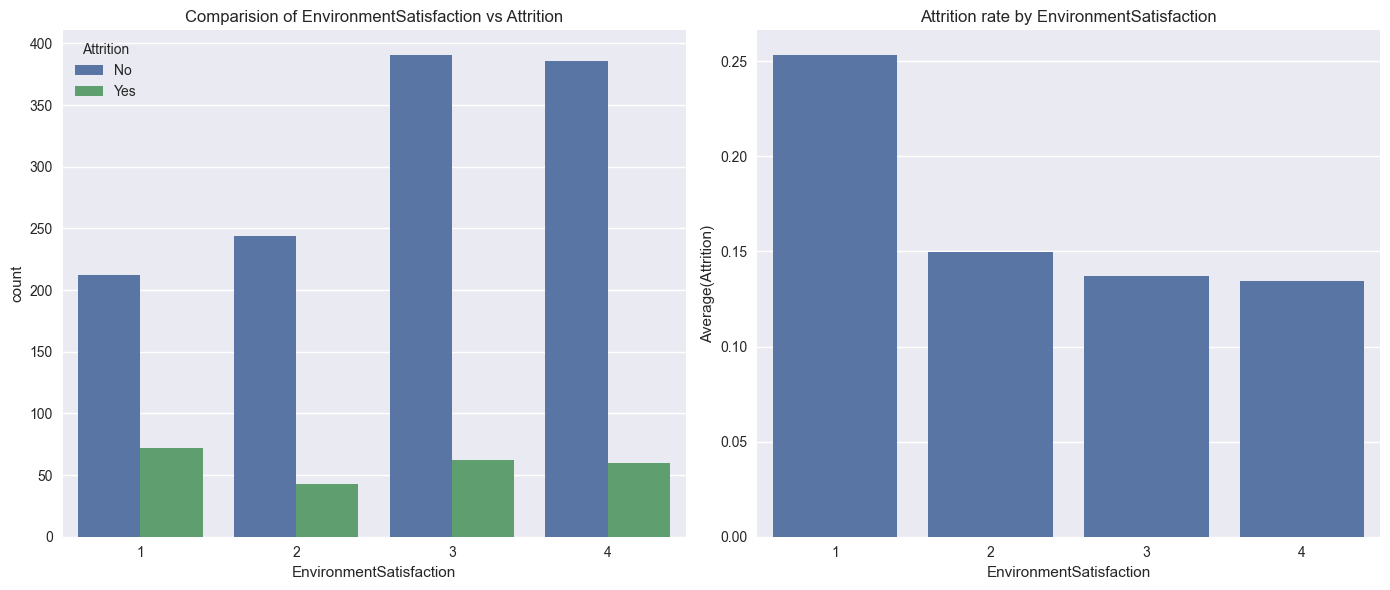

In [40]:
CategoricalVariables_targetPlots(employee_data,"EnvironmentSatisfaction")

 we can see that people having low environment satisfaction 25% leave the company

### Gender Vs Attrition

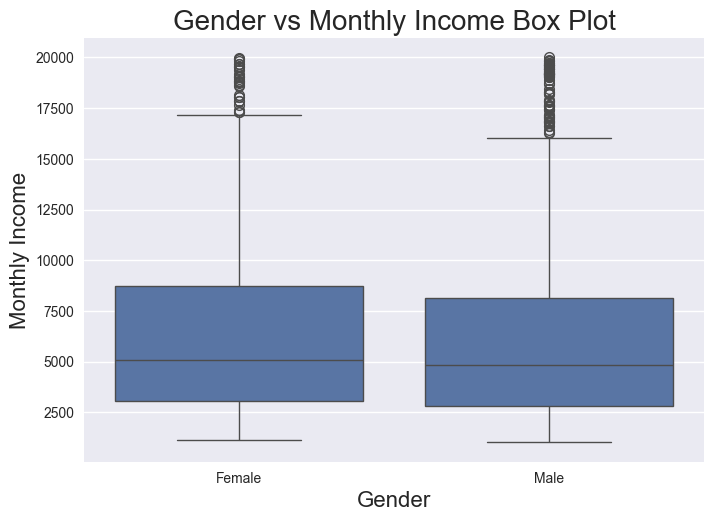

In [41]:
# sns.boxplot(employee_data['Gender'], employee_data['MonthlyIncome'])
# plt.title('MonthlyIncome vs Gender Box Plot', fontsize=20)      
# plt.xlabel('MonthlyIncome', fontsize=16)
# plt.ylabel('Gender', fontsize=16)
# plt.show()

sns.boxplot(x="Gender", y="MonthlyIncome", data=employee_data)
plt.title('Gender vs Monthly Income Box Plot', fontsize=20)      
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Monthly Income', fontsize=16)
plt.show()

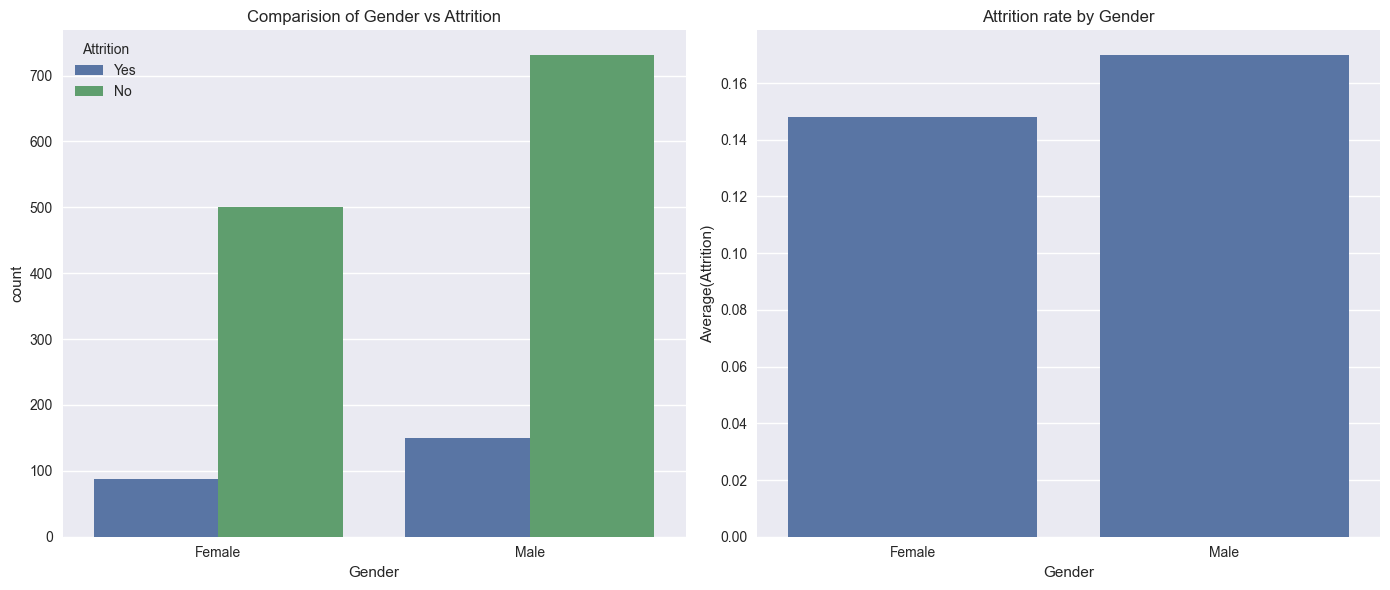

In [42]:
CategoricalVariables_targetPlots(employee_data,"Gender")

- Monthly Income distribution for Male and Female is almost similar, so the attrition rate of Male and Female is almost the same around 15%. Gender is not a strong indicator of attrition

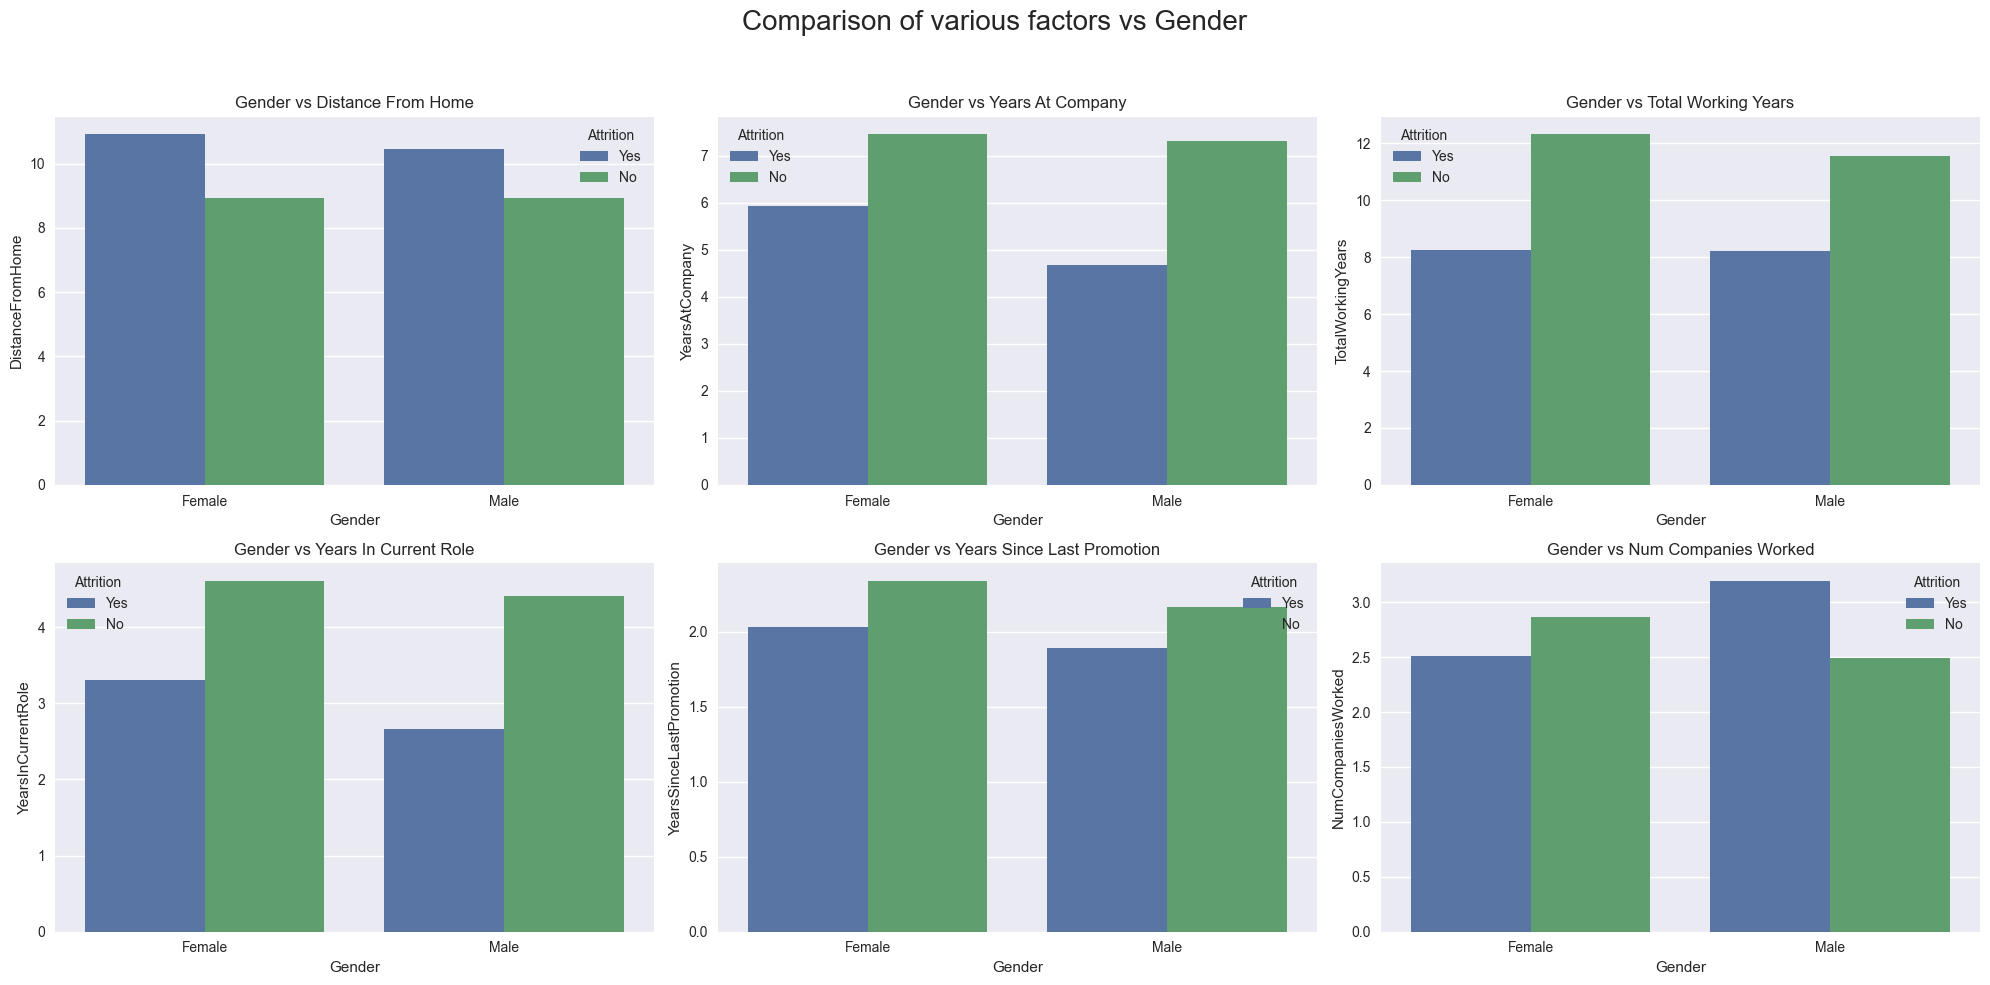

In [43]:
# fig,ax = plt.subplots(2,3, figsize=(20,20))               # 'ax' has references to all the four axes
# plt.suptitle("Comparision of various factors vs Gender", fontsize=20)
# sns.barplot(employee_data['Gender'],employee_data['DistanceFromHome'],hue = employee_data['Attrition'], ax = ax[0,0],ci=None); 
# sns.barplot(employee_data['Gender'],employee_data['YearsAtCompany'],hue = employee_data['Attrition'], ax = ax[0,1],ci=None); 
# sns.barplot(employee_data['Gender'],employee_data['TotalWorkingYears'],hue = employee_data['Attrition'], ax = ax[0,2],ci=None); 
# sns.barplot(employee_data['Gender'],employee_data['YearsInCurrentRole'],hue = employee_data['Attrition'], ax = ax[1,0],ci=None); 
# sns.barplot(employee_data['Gender'],employee_data['YearsSinceLastPromotion'],hue = employee_data['Attrition'], ax = ax[1,1],ci=None); 
# sns.barplot(employee_data['Gender'],employee_data['NumCompaniesWorked'],hue = employee_data['Attrition'], ax = ax[1,2],ci=None); 
# plt.show()

fig, ax = plt.subplots(2, 3, figsize=(20, 10))  
plt.suptitle("Comparison of various factors vs Gender", fontsize=20)

sns.barplot(x='Gender', y='DistanceFromHome', hue='Attrition', data=employee_data, ax=ax[0,0], ci=None)
ax[0,0].set_title('Gender vs Distance From Home')

sns.barplot(x='Gender', y='YearsAtCompany', hue='Attrition', data=employee_data, ax=ax[0,1], ci=None)
ax[0,1].set_title('Gender vs Years At Company')

sns.barplot(x='Gender', y='TotalWorkingYears', hue='Attrition', data=employee_data, ax=ax[0,2], ci=None)
ax[0,2].set_title('Gender vs Total Working Years')

sns.barplot(x='Gender', y='YearsInCurrentRole', hue='Attrition', data=employee_data, ax=ax[1,0], ci=None)
ax[1,0].set_title('Gender vs Years In Current Role')

sns.barplot(x='Gender', y='YearsSinceLastPromotion', hue='Attrition', data=employee_data, ax=ax[1,1], ci=None)
ax[1,1].set_title('Gender vs Years Since Last Promotion')

sns.barplot(x='Gender', y='NumCompaniesWorked', hue='Attrition', data=employee_data, ax=ax[1,2], ci=None)
ax[1,2].set_title('Gender vs Num Companies Worked')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # To prevent overlap with suptitle
plt.show()

1. Distance from home matters to women employees more than men. 
2. Female employes are spending more years in one company compare to their counterpart. 
3. Female employes spending more years in current company are more inclined to switch.

### Job Role

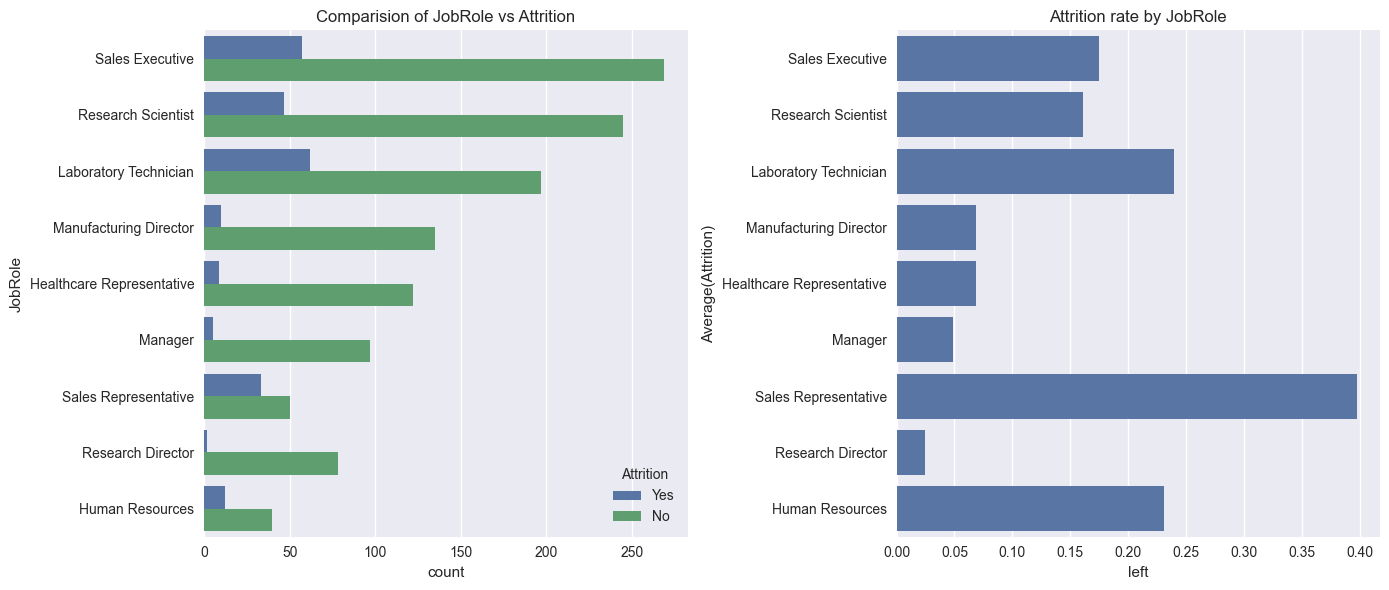

In [44]:
CategoricalVariables_targetPlots(employee_data,"JobRole",invert_axis=True)

1. Jobs held by the employee is maximum in Sales Executive, then R&D , then Laboratory Technician
2. People working in Sales department is most likely quit the company followed by Laboratory Technician and Human Resources there attrition rates are 40%, 24% and 22% respectively

### Marital Status

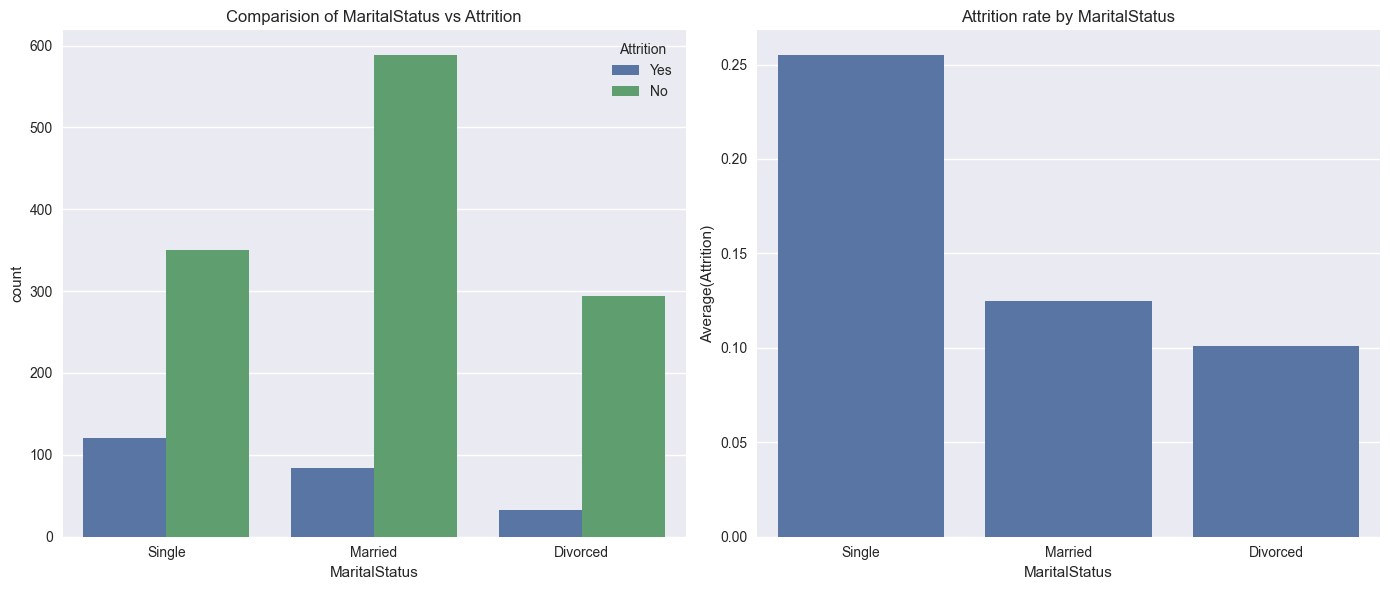

In [45]:
CategoricalVariables_targetPlots(employee_data,"MaritalStatus")

From the plot,it is understood that irrespective of the marital status,there are large people who stay with the company and do not leave.Therefore,marital status is a weak predictor of attrition

### Building Decision Tree

In [46]:
from sklearn.model_selection import train_test_split

#for fitting classification tree
from sklearn.tree import DecisionTreeClassifier

#to create a confusion matrix
from sklearn.metrics import confusion_matrix

#import whole class of metrics
from sklearn import metrics

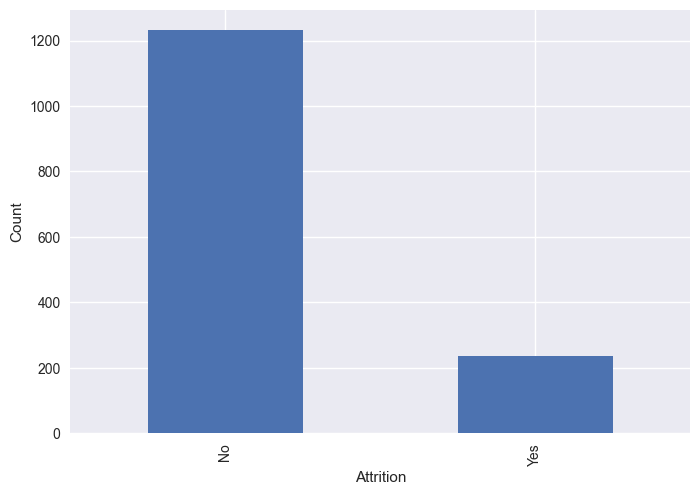

In [50]:
employee_data.Attrition.value_counts().plot(kind = "bar")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

In [49]:
employee_data["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [51]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in employee_data.select_dtypes(include='object').columns:
    employee_data[column] = le.fit_transform(employee_data[column])


In [52]:
# Define features and target
X = employee_data.drop('Attrition', axis=1)  # assuming 'Attrition' is the target
y = employee_data['Attrition']

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

In [55]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 1.0

Confusion Matrix:
 [[255   0]
 [  0  39]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00        39

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [56]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

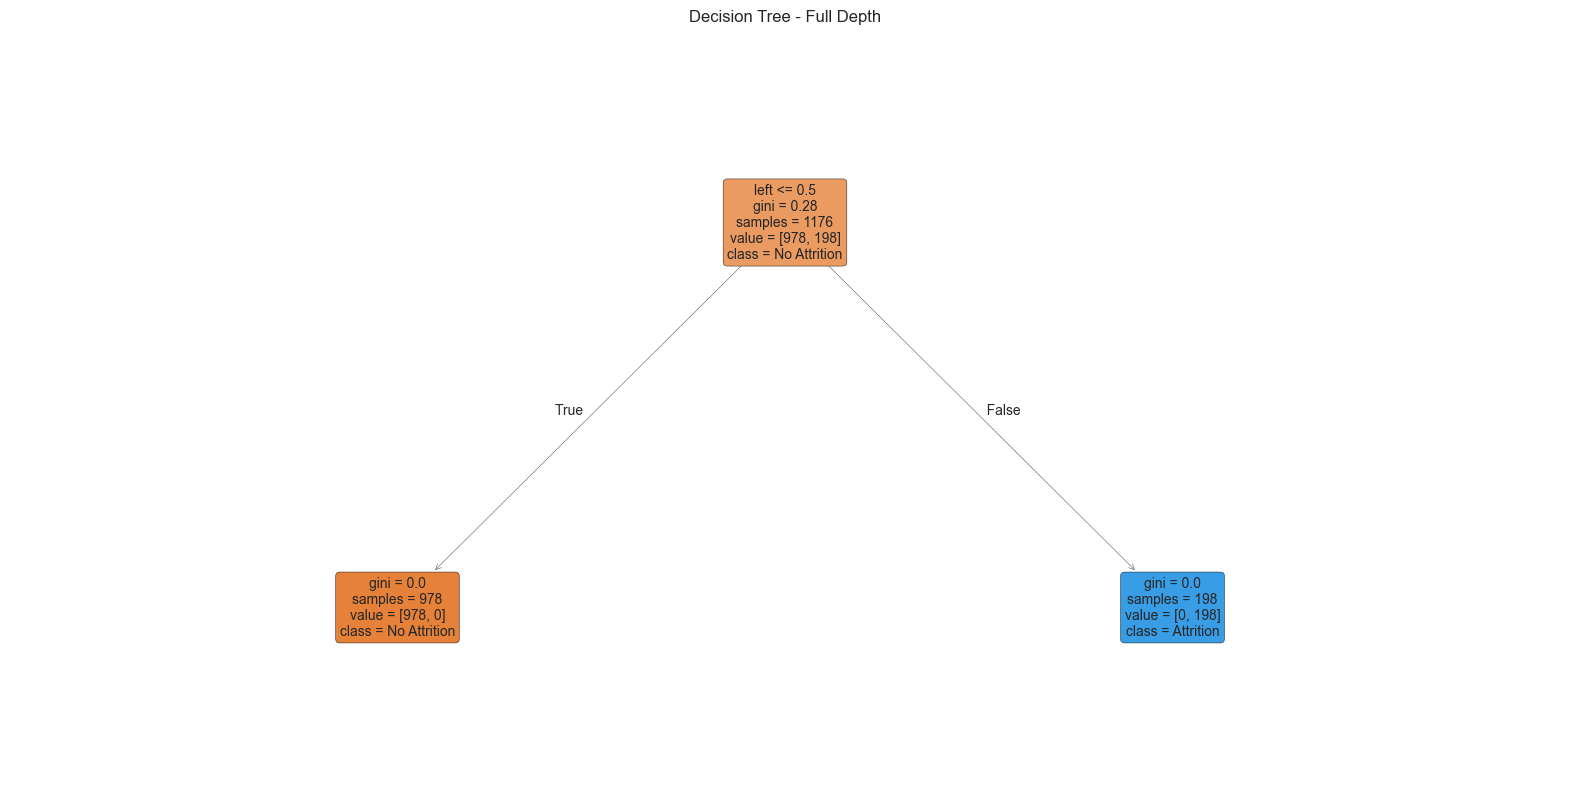

In [57]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, 
          feature_names=X.columns, 
          class_names=['No Attrition', 'Attrition'], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree - Full Depth")
plt.show()

In [58]:
print(X.columns.tolist())


['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'left']


In [59]:
employee_data = employee_data.drop(columns=['left', 'EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'])

In [61]:
# Step 3: Drop Irrelevant Columns (only if they exist)
columns_to_drop = ['left', 'EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18']
existing_cols = [col for col in columns_to_drop if col in employee_data.columns]
employee_data.drop(columns=existing_cols, inplace=True)


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [63]:
employee_data = pd.read_excel(r"C:\Users\Dell\Downloads\HRAnalyticsEmployeeAttrition\HRAnalyticsEmployeeAttrition-master\data\Attrition.xlsx")

In [65]:
# Step 3: Drop Irrelevant Columns (only if they exist)
columns_to_drop = ['left', 'EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18']
existing_cols = [col for col in columns_to_drop if col in employee_data.columns]
employee_data.drop(columns=existing_cols, inplace=True)


In [66]:
le = LabelEncoder()
for column in employee_data.select_dtypes(include='object').columns:
    employee_data[column] = le.fit_transform(employee_data[column])


In [67]:
X = employee_data.drop('Attrition', axis=1)
y = employee_data['Attrition']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [71]:
y_pred = dt_model.predict(X_test)

In [72]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.7993197278911565

📊 Confusion Matrix:
 [[226  29]
 [ 30   9]]

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       255
           1       0.24      0.23      0.23        39

    accuracy                           0.80       294
   macro avg       0.56      0.56      0.56       294
weighted avg       0.80      0.80      0.80       294



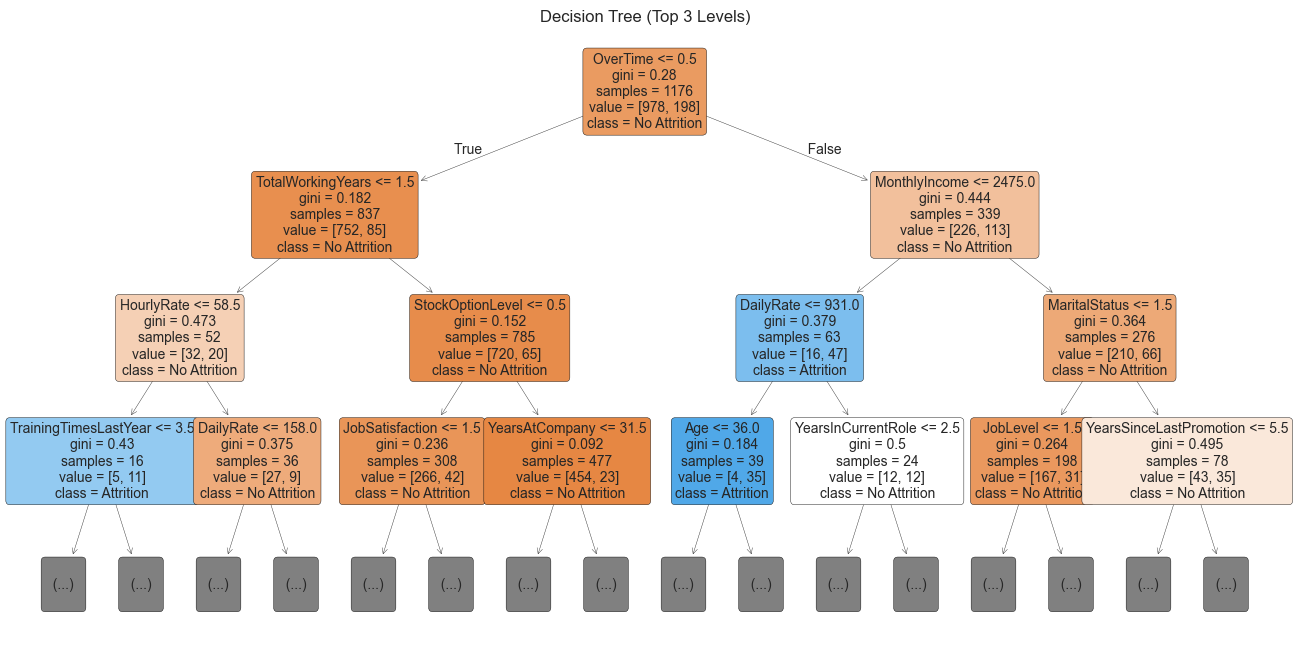

In [73]:
plt.figure(figsize=(16,8))
plot_tree(dt_model, 
          feature_names=X.columns, 
          class_names=['No Attrition', 'Attrition'], 
          filled=True, 
          rounded=True, 
          fontsize=10, 
          max_depth=3)
plt.title("Decision Tree (Top 3 Levels)")
plt.show()

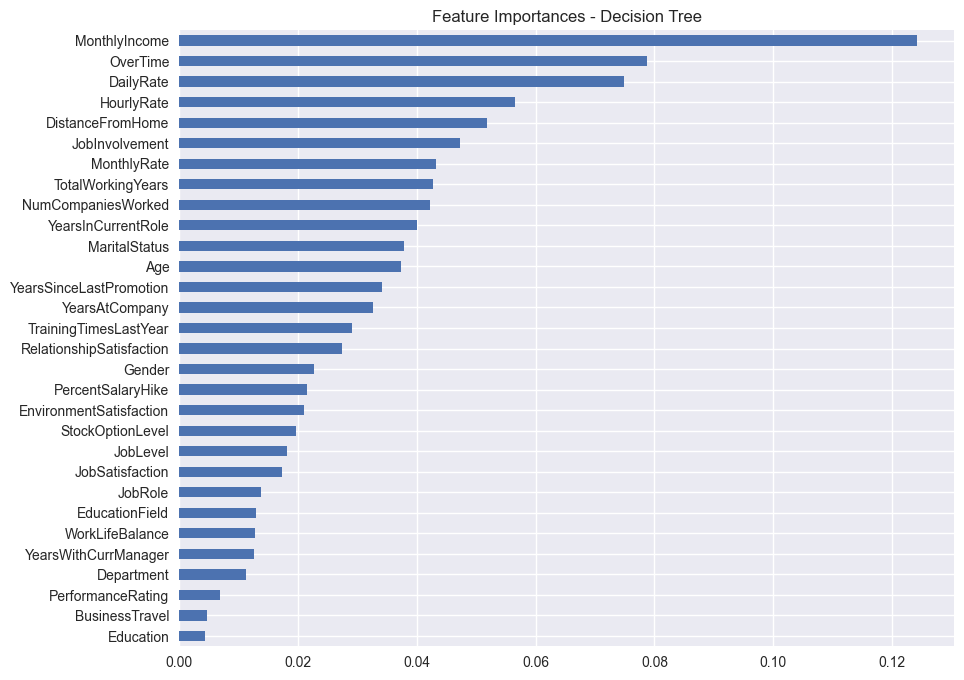

In [74]:
importances = pd.Series(dt_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 8), title='Feature Importances - Decision Tree')
plt.show()
